# How many cases are in your county, and how bad is it in relation to other counties?
### E. Shalev

### Using KNN cluster analysis on the NY Times data, I divided all the counties in the US into 6 clusters based on the number of cases. New York City is its own cluster, then the rest of the country is divided into 5 more clusters. Since oneof the main problems we are facing is the overwhelming number of patients that require treatment in hospitals, it's important to know how many confirmed cases of covid19 are in each county, and how severe is it. By knowing how bad each county is doing, government can assess where they need to invest most resources.

### I added a tool to allow the user enter which county, state they reside in, and find out how bad is the status of covid19 cases is there. 

### The results shown below were last updated on April 6th, but since the program reads the data directly from NY Times' Github, every time the code is run it reads the most updated data.

##### Finally, I added another cluster analysis, without New York City, NY and Unknown, NY as they were the two outliers in the data. You can see the additional clustering at the bottom. Each cluster is colored differently, and each centroid is colored in red (this is true for the first clustering as well).

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing NY Times' covid data by county
covid_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
covid_county.to_csv('covid_county.csv')
covid_county

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
38192,2020-04-06,Sublette,Wyoming,56035.0,1,0
38193,2020-04-06,Sweetwater,Wyoming,56037.0,5,0
38194,2020-04-06,Teton,Wyoming,56039.0,40,0
38195,2020-04-06,Uinta,Wyoming,56041.0,3,0


In [4]:
# Adding an attribute to include county and state in order to avoid grouping different counties with the same name
covid_county['county_state'] = covid_county['county']+', '+covid_county['state']

# Creating new dataframe to only contain the most updated number of cases and deaths by county
counties_sum = covid_county.groupby(['county_state']).max()
counties_sum = counties_sum.drop(counties_sum.columns[0:4], axis=1)

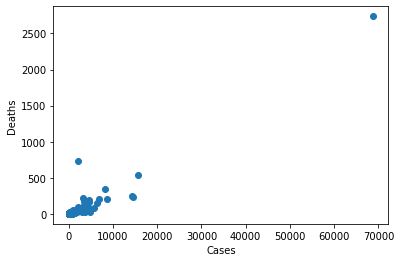

In [5]:
# Plotting all counties using most updated counts of cases and deaths
plt.scatter(counties_sum['cases'], counties_sum['deaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

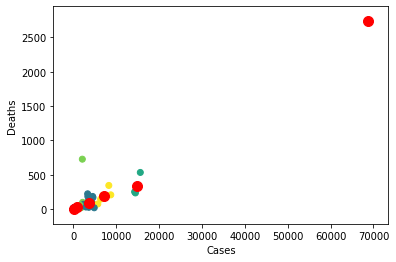

In [6]:
# Running cluster analysis and creating 5 clusters to categorzie all counties by level of severity
kmeans = KMeans(n_clusters=6, random_state=5).fit(counties_sum)
pred = kmeans.fit_predict(counties_sum)

# Plotting all counties, coloring each cluster by a unique color, with a red dot showing each centroid
plt.scatter(counties_sum['cases'], counties_sum['deaths'], c=kmeans.labels_.astype(int))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

In [7]:
# Adding a cluster number column to the dataframe, and creating dataframes for each of the clusters
counties_sum['Cluster Number'] = pred
least_worst_counties = counties_sum[counties_sum['Cluster Number']==0]
New_York_City = counties_sum[counties_sum['Cluster Number']==1]
middle_of_the_group = counties_sum[counties_sum['Cluster Number']==2]
worst_counties = counties_sum[counties_sum['Cluster Number']==3]
not_so_bad = counties_sum[counties_sum['Cluster Number']==4]
second_worst = counties_sum[counties_sum['Cluster Number']==5]

# Adding a descriptive column with a name for each cluster
counties_sum['Cluster Name'] = 'x'
counties_sum.loc[counties_sum['Cluster Number'] == 0, 'Cluster Name'] = 'Least Worst Counties'
counties_sum.loc[counties_sum['Cluster Number'] == 1, 'Cluster Name'] = 'New York City'
counties_sum.loc[counties_sum['Cluster Number'] == 2, 'Cluster Name'] = 'Middle Of The Group'
counties_sum.loc[counties_sum['Cluster Number'] == 3, 'Cluster Name'] = 'Worst Counties'
counties_sum.loc[counties_sum['Cluster Number'] == 4, 'Cluster Name'] = 'Not So Bad Counties'
counties_sum.loc[counties_sum['Cluster Number'] == 5, 'Cluster Name'] = 'Second Worst Counties'
counties_sum

,cases,deaths,Cluster Number,Cluster Name
county_state,,,,
"Abbeville, South Carolina",6,0,0,Least Worst Counties
"Acadia, Louisiana",79,2,0,Least Worst Counties
"Accomack, Virginia",11,0,0,Least Worst Counties
"Ada, Idaho",419,3,0,Least Worst Counties
"Adair, Iowa",1,0,0,Least Worst Counties
...,...,...,...,...
"Yuba, California",11,0,0,Least Worst Counties
"Yukon-Koyukuk Census Area, Alaska",1,0,0,Least Worst Counties
"Yuma, Arizona",15,0,0,Least Worst Counties


In [8]:
user_county = input('Enter your County, State to see how the level of covid19 cases: ')
user_county = user_county.title()
print('Your county is in the group of', counties_sum.loc[user_county, 'Cluster Name'])

Enter your County, State to see how the level of covid19 cases: westchester, new york
Your county is in the group of Worst Counties


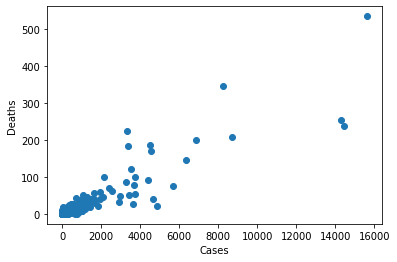

In [12]:
# There are two outliers in the dataset: New York City, NY and Unknown, NY. 
# Creating another dataframe excluding the two outliers for another cluster analysis.
counties_sum_noNYC = counties_sum.drop('New York City, New York', axis=0)
counties_sum_noNYC = counties_sum_noNYC.drop('Unknown, New York', axis=0)
counties_sum_noNYC = counties_sum_noNYC.iloc[:, :2]
plt.scatter(counties_sum_noNYC['cases'], counties_sum_noNYC['deaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

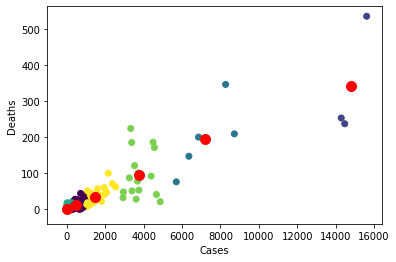

In [18]:
# Running cluster analysis and creating 6 clusters to categorzie all counties by level of severity
kmeans2 = KMeans(n_clusters=6, random_state=5).fit(counties_sum_noNYC)
pred2 = kmeans.fit_predict(counties_sum_noNYC)

# Plotting all counties, coloring each cluster by a unique color, with a red dot showing each centroid
plt.scatter(counties_sum_noNYC['cases'], counties_sum_noNYC['deaths'], c=kmeans2.labels_.astype(int))
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()